In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#設定繪圖桌布大小
plt.rcParams['figure.figsize']=(5.0,5.0)

In [ ]:
#讀取檔案，將檔案名稱設為data
data=pd.read_excel('nba2.xlsx')

# 一、單一變數資料分布圖形：直方圖、長條圖與圓餅圖

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


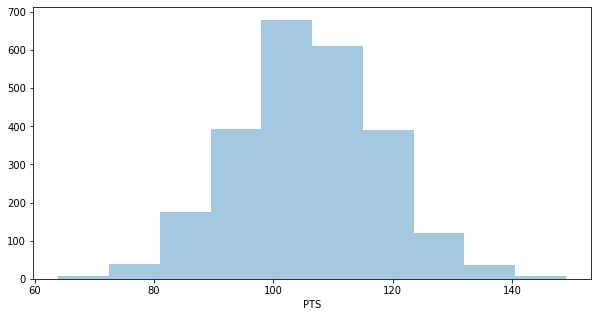

In [ ]:
#用seaborn畫一個直方圖（distplot）、處理遺失值(空值)（dropna）、調整級距(幾個長條圖)（bins distribution）, bins=10:區分成10個級距
sns.distplot(data['PTS'].dropna(),bins=10,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


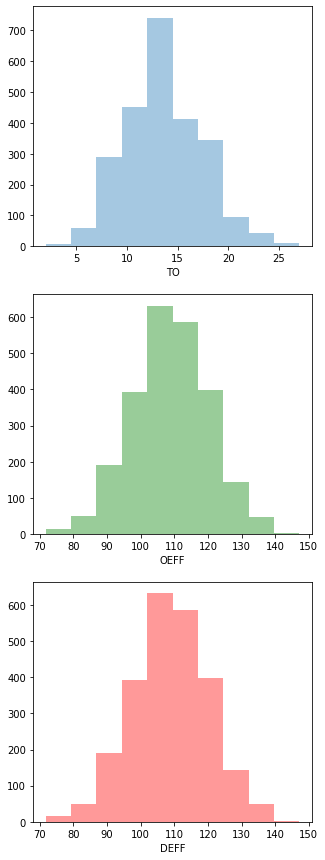

In [ ]:
#一次畫多個直方圖（axes陣列位置); axes=plt.subplots(3):畫出三個圖形; color='lime'為顏色設定
plt.rcParams['figure.figsize']=(5.0,15.0) #(寬,高)
fig, axes=plt.subplots(3)
sns.distplot(data['TO'],ax=axes[0],bins=10,kde=False)
sns.distplot(data['OEFF'],ax=axes[1],color='green',bins=10,kde=False)
sns.distplot(data['DEFF'],ax=axes[2],color='red',bins=10,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


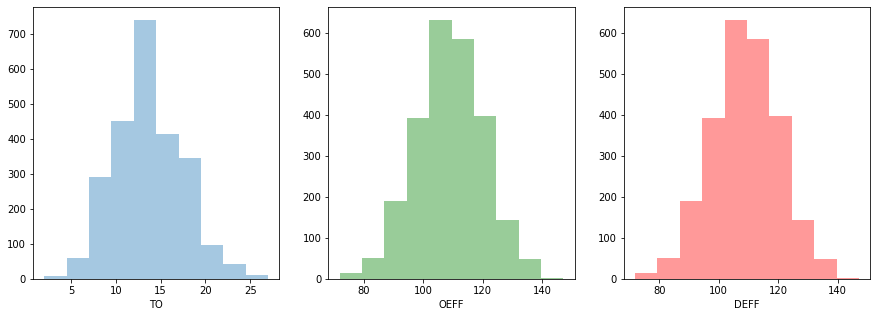

In [ ]:
plt.rcParams['figure.figsize']=(15.0,5.0)
fig, (ax1,ax2,ax3)=plt.subplots(1,3)
sns.distplot(data['TO'],ax=ax1,bins=10,kde=False)
sns.distplot(data['OEFF'],ax=ax2,color='green',bins=10,kde=False)
sns.distplot(data['DEFF'],ax=ax3,color='red',bins=10,kde=False)

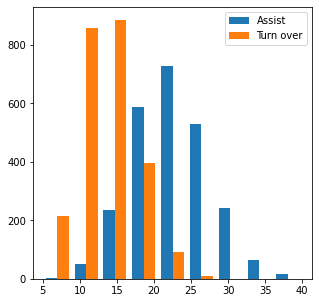

In [ ]:
#多個重疊直方圖(採用繪圖套件)
#比較助攻及失誤的分配差異
plt.rcParams['figure.figsize']=(5.0,5.0)
a = data['A']
b = data['TO']
bins = np.linspace(5, 40, 10) #設定數值範圍及bin個數

plt.hist([a, b], bins, label=['Assist', 'Turn over'])
plt.legend(loc='upper right') #右上
plt.show()

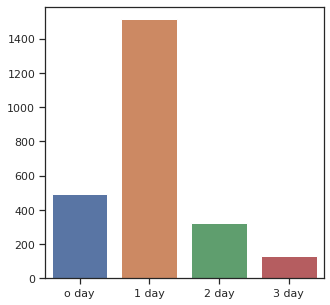

In [ ]:
#利用seaborn畫一個長條圖; style='ticks':設定圖型底色
sns.set(style='ticks')
result=[sum(data['REST DAYS']==0),sum(data['REST DAYS']==1),sum(data['REST DAYS']==2),sum(data['REST DAYS']==3)]
sns.barplot(x=['o day','1 day','2 day',"3 day"],y=result)

請劃出輸贏平均得分之長條圖

In [ ]:
#先計算輸贏平均得分
f=data.groupby('W/L')
#用size()看f裡面每個組別內的大小
g=f.mean()
g[["PTS","A"]]

,PTS,A
W/L,,
0,99.929268,20.973171
1,111.251220,24.278862


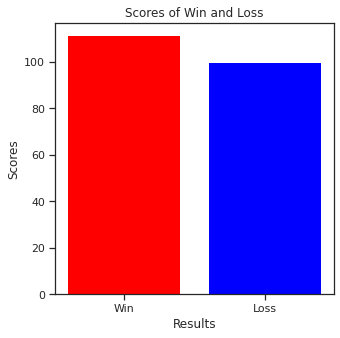

In [ ]:
#採用繪圖套件劃出長條圖
Result = ['Win', 'Loss']
scores = [111.25, 99.92]
x = np.arange(len(Result))
plt.bar(x, scores, color=['red', 'blue'])
plt.xticks(x, Result)
plt.xlabel('Results')
plt.ylabel('Scores')
plt.title('Scores of Win and Loss')
plt.show()

比較多個類別資料之分布(例子: 請同時劃出不同休息天數之輸、贏的長條圖)

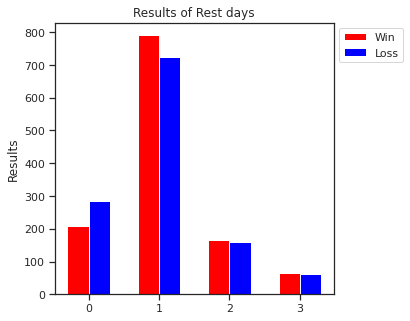

In [ ]:
#採用繪圖套件劃出長條圖
Rest_days= ['0', '1','2','3']
Win = [207,790,167,66]
Loss = [285,723,159,63]
x = np.arange(len(Rest_days))
width = 0.3 #寬度
plt.bar(x, Win, width, color='red', label='Win')
plt.bar(x + width, Loss, width, color='blue', label='Loss')
plt.xticks(x + width / 2, Rest_days) #最下面0123的位子在中間
plt.ylabel('Results')
plt.title('Results of Rest days')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

依多個類別資料下某一量化變數之分布(例子: 請依東西區在輸贏時之平均得分的長條圖)

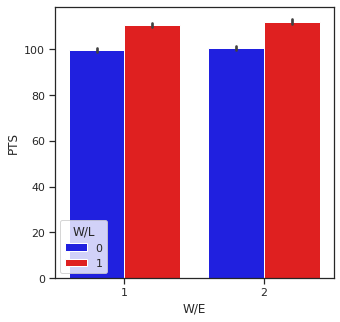

In [ ]:
sns.barplot(x="W/E",y="PTS", hue="W/L", palette=["blue", "red"], data=data)

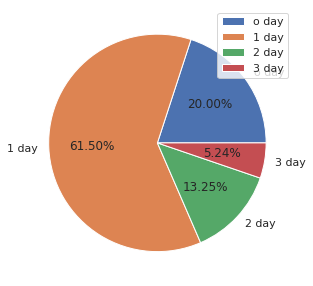

In [ ]:
#畫圓餅圖:休息天數
plt.rcParams['figure.facecolor']='white'
fig, axes=plt.subplots()
axes.pie([sum(data['REST DAYS']==0),sum(data['REST DAYS']==1),sum(data['REST DAYS']==2),sum(data['REST DAYS']==3)],labels=['o day','1 day','2 day','3 day'],autopct='%.2f%%')
plt.legend(labels=['o day','1 day','2 day','3 day'])
plt.show()

圖檔儲存

In [ ]:
fig.savefig('fig_5.pdf')

In [ ]:
fig.savefig('fig_5.png')

# Exercise
1.請針對「2019STA.xlsx」檔案中小考與期中考成績，畫出成績的分佈圖(直方圖)

2.請針對「2019STA.xlsx」檔案中性別，畫出性別個數的長條圖

3.請針對「2019STA.xlsx」檔案中性別，畫出性別比例的圓餅圖

In [ ]:
data2=pd.read_excel('2019STA.xlsx')
data2.head()

,Department,Grade,Gender,Quiz,Mid_Exam,Final_Exam
0,BA,一A,M,81,72.0,80
1,BA,一A,M,80,87.5,90
2,BA,一A,M,69,74.0,76
3,BA,一A,F,58,52.0,50
4,BA,一A,M,82,76.0,78


第一題

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


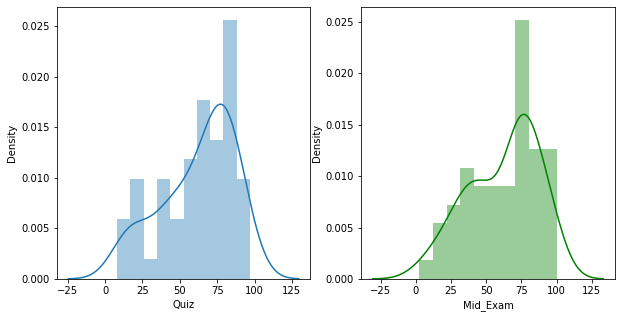

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
fig,(ax1,ax2)=plt.subplots(1,2)
sns.distplot(data2['Quiz'],ax=ax1,bins=10,kde=True)
sns.distplot(data2['Mid_Exam'],ax=ax2,color='green',bins=10,kde=True)

第二題

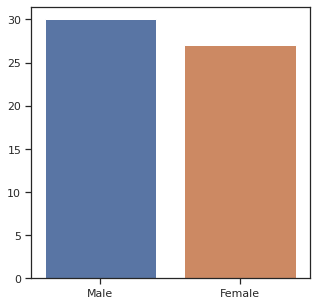

In [ ]:
sns.set(style='ticks')
result=[sum(data2['Gender']=='M'),sum(data2['Gender']=='F')]
sns.barplot(x=['Male','Female'],y=result)

第三題

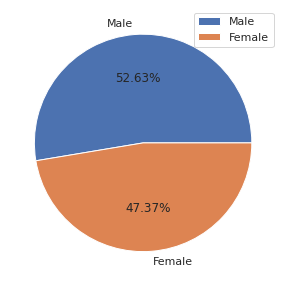

In [ ]:
plt.rcParams['figure.facecolor']='white'
fig, axes=plt.subplots()
axes.pie([sum(data2['Gender']=='M'),sum(data2['Gender']=='F')],labels=['Male','Female'],autopct='%.2f%%')
plt.legend(labels=['Male','Female'])
plt.show()